# Seattle Airbnb reviews

## The aim of the project is to use NLP and text analytics to answer the following questions: 

1. Are the majority of people who use Airbnb's services in Seattle happy with their stay or not?
2. Which were the top 5 houses listed on Airbnb according to the reviews?
3. What are the most popular words in Airbnb seattle reviews?

In [19]:
# importing libraries and dependancies: 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

data = pd.read_csv('reviews.csv')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Here after importing the libraries I'll explore the data to the see the various datatypes and drop rows with missing values (if any)

In [20]:
data.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [21]:
data.shape

(84849, 6)

In [22]:
data = data.dropna()

In [23]:
data.shape

(84831, 6)

Since only a few rows (18) had missing data, I found it better to drop those and work on the remaining data

In [24]:
data.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [25]:
data['comments'].head()

0    Cute and cozy place. Perfect location to every...
1    Kelly has a great room in a very central locat...
2    Very spacious apartment, and in a great neighb...
3    Close to Seattle Center and all it has to offe...
4    Kelly was a great host and very accommodating ...
Name: comments, dtype: object

In [26]:
# calling the function
sia = SentimentIntensityAnalyzer()

In [27]:
data['negative'] = data['comments'].apply(lambda x : sia.polarity_scores(x)['neg'])
data['neutral'] = data['comments'].apply(lambda x : sia.polarity_scores(x)['neu'])
data['positive'] = data['comments'].apply(lambda x : sia.polarity_scores(x)['pos'])
data['compound'] = data['comments'].apply(lambda x : sia.polarity_scores(x)['compound'])

In [28]:
data.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,negative,neutral,positive,compound
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,0.000,0.462,0.538,0.7901
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,0.000,0.609,0.391,0.9872
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",0.043,0.772,0.185,0.8718
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,0.035,0.765,0.200,0.8313
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,0.000,0.655,0.345,0.9783


## Finding the percentage of positive, negative and neutral reviews : 

Reviews with less than -0.4 sentiment are taken as negative reviews. Sentiment of polarity greater than 0.4 is positive and anything in between -0.4 and 0.4 is neutral sentiment.

In [29]:
# Counting the positive, negative and neutral reviews : 

positive_reviews = np.sum(i > 0.4 for i in data['compound'])
neutral_reviews = np.sum(-0.4 < i < 0.4 for i in data['compound'])
negative_reviews = np.sum(i < -0.4 for i in data['compound'])
n = len(data['compound'])

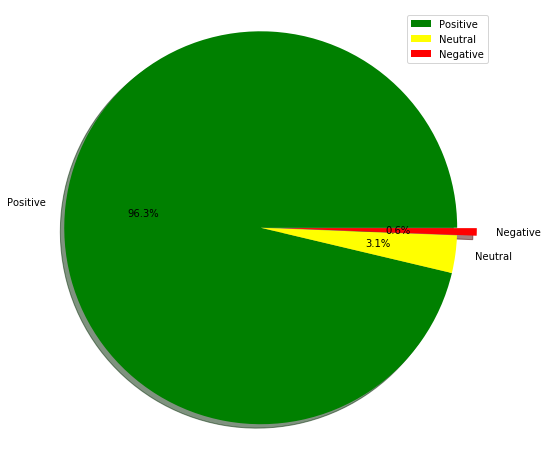

In [30]:
# Visualizing the percentage of positive, negative and neutral reviews : 
# Data to plot
labels = 'Positive', 'Neutral', 'Negative'
sizes = [(positive_reviews * 100)/n, (neutral_reviews * 100)/n, (negative_reviews * 100)/n]
colors = ['green', 'yellow', 'red']
explode = (0, 0, 0.1)  # explode 1st slice

# Plot
plt.figure(figsize =(8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)

plt.axis('equal') #Equal aspect ratio ensures that pie is drawn as a circle
plt.legend()
plt.show()

## Top 5 houses listed on Airbnb seattle according to reviews in 2015: 

In order to calculate this I grouped the compound sentiment polarity ratings by their listing IDs

In [31]:
data.groupby(data['listing_id']).mean().sort_values('compound').tail()

,listing_id,id,reviewer_id,negative,neutral,positive,compound
listing_id,,,,,,,
8483744,8483744.0,57148123.0,30276780.0,0.010,0.783,0.207,0.9947
8988178,8988178.0,54923185.0,5956272.0,0.011,0.672,0.318,0.9947
5968862,5968862.0,36296107.0,28997393.0,0.017,0.678,0.305,0.9958
3888986,3888986.0,41576826.0,26518982.0,0.000,0.606,0.394,0.9960
9367465,9367465.0,55521232.0,49579198.0,0.024,0.752,0.224,0.9965


## Most prominent words in Airbnb reviews: 

In order to answer this I decided to create a word cloud

In [32]:
from wordcloud import WordCloud, STOPWORDS

In [33]:
stopwords = set(STOPWORDS)
text = " ".join(i for i in data['comments'])

In [34]:
print ("There are {} words in the combination of all reviews.".format(len(text)))

There are 32747568 words in the combination of all reviews.


In [35]:
# Generating a wordcloud image: 
wordcloud = WordCloud(stopwords=stopwords, background_color="black", max_words=100).generate(text)

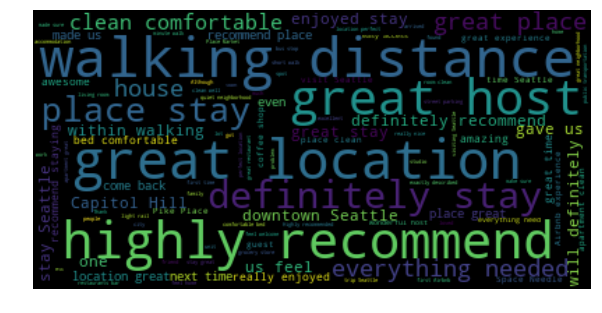

In [36]:
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()